In [1]:
#Import the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [2]:
#Import the dataset
cancerdata = pd.read_csv('data.csv')


In [5]:
#review the first five rows of the dataset
cancerdata.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


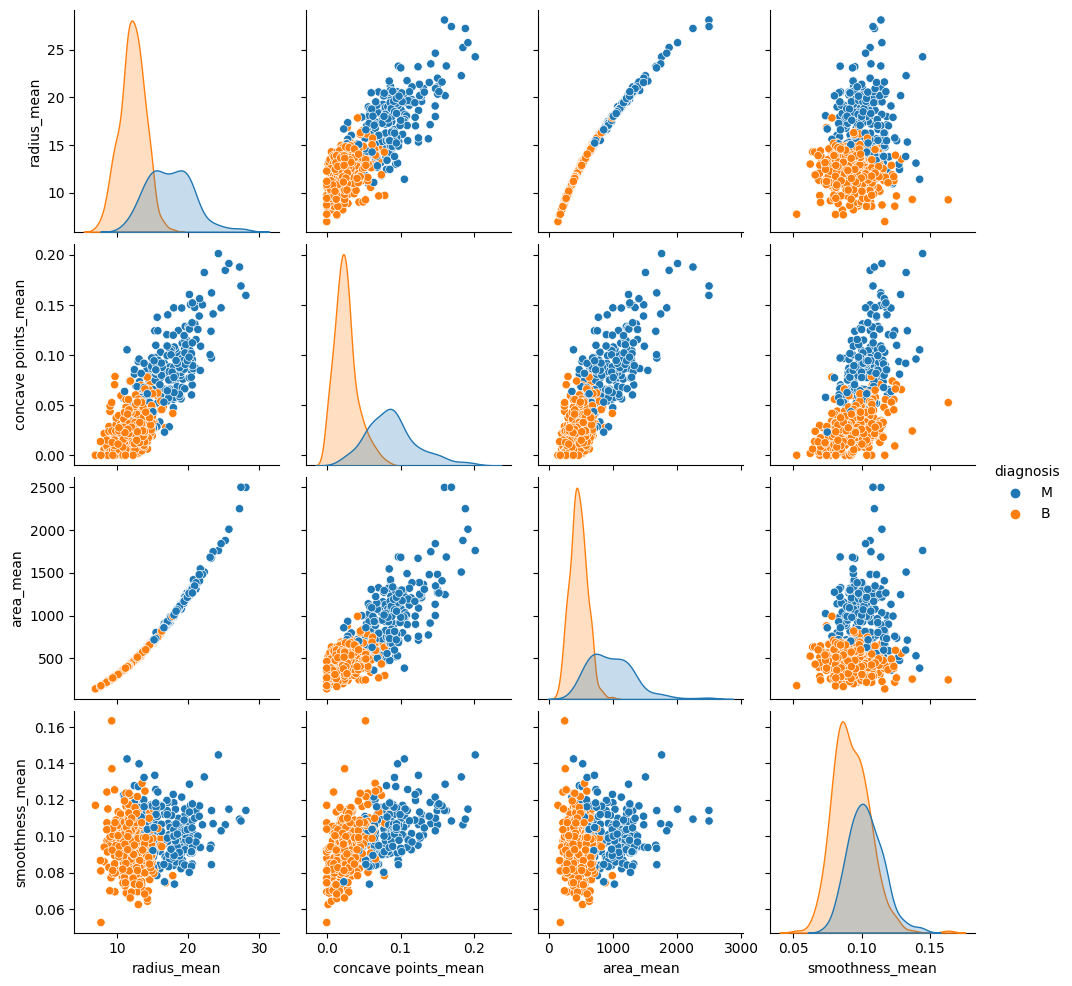

In [6]:
#create a pairplot to visualize the cancer if its malignant or benign
sns.pairplot(cancerdata, hue='diagnosis',vars = ['radius_mean','concave points_mean','area_mean','smoothness_mean'])

In [10]:
#upon initial visualziation we found out that area_mean and Concave points_mean are some of the good classifier for our use because of the separation of the two variables
X = cancerdata.drop(['id',"diagnosis"],axis=1)#drop the target class from train set
Y = cancerdata['diagnosis']#seperating out the target class
print(X.columns)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [11]:
#To deal with null data
X=X.dropna(axis=1) #axis-1 is for horizontal across colums
print(X.columns)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=47)
print(X_train.shape)
print(Y_train.shape)

(455, 30)
(455,)


In [32]:
#building the model
from sklearn import svm
svc_model = svm.SVC()
svc_model.fit(X_train,Y_train)

SVC()

In [17]:
y_predict = svc_model.predict(X_test) # get 'y' by predict FOR the TEST values.
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(Y_test,y_predict) # we use the confusion matrix to check
                                        #how our predicted y compares to the
                                        # real one.
sns.heatmap(cm,annot=True) 

<AxesSubplot:>

In [18]:
print(classification_report(Y_test,y_predict)) #checking the precision and accuracy

              precision    recall  f1-score   support

           B       0.91      0.96      0.93        70
           M       0.93      0.84      0.88        44

    accuracy                           0.91       114
   macro avg       0.92      0.90      0.91       114
weighted avg       0.91      0.91      0.91       114



In [20]:
min_train = X_train.min() #use unity based normalization to solve contrasting ranges 
min_train

radius_mean                  6.981000
texture_mean                 9.710000
perimeter_mean              43.790000
area_mean                  143.500000
smoothness_mean              0.052630
compactness_mean             0.019380
concavity_mean               0.000000
concave points_mean          0.000000
symmetry_mean                0.106000
fractal_dimension_mean       0.049960
radius_se                    0.111500
texture_se                   0.360200
perimeter_se                 0.771400
area_se                      6.802000
smoothness_se                0.002667
compactness_se               0.002252
concavity_se                 0.000000
concave points_se            0.000000
symmetry_se                  0.007882
fractal_dimension_se         0.000950
radius_worst                 7.930000
texture_worst               12.020000
perimeter_worst             50.410000
area_worst                 185.200000
smoothness_worst             0.081250
compactness_worst            0.034320
concavity_wo

In [21]:
range_train = (X_train-min_train).max()
range_train

radius_mean                  21.129000
texture_mean                 29.570000
perimeter_mean              144.710000
area_mean                  2357.500000
smoothness_mean               0.092070
compactness_mean              0.326020
concavity_mean                0.426800
concave points_mean           0.201200
symmetry_mean                 0.184600
fractal_dimension_mean        0.047480
radius_se                     2.761500
texture_se                    3.535800
perimeter_se                 21.208600
area_se                     535.398000
smoothness_se                 0.028463
compactness_se                0.133148
concavity_se                  0.396000
concave points_se             0.052790
symmetry_se                   0.071068
fractal_dimension_se          0.028890
radius_worst                 28.110000
texture_worst                35.140000
perimeter_worst             200.790000
area_worst                 4068.800000
smoothness_worst              0.137150
compactness_worst        

In [22]:
X_train_scaled = (X_train-min_train)/range_train
X_train_scaled

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
536,0.344976,0.434224,0.345380,0.206278,0.555773,0.294522,0.342784,0.305119,0.469122,0.207666,...,0.261829,0.633182,0.268390,0.133479,0.413781,0.233452,0.361880,0.468041,0.223339,0.186738
254,0.590137,0.325330,0.571557,0.434995,0.552514,0.304951,0.323102,0.426988,0.387866,0.137110,...,0.632159,0.357143,0.561233,0.439147,0.499089,0.275262,0.368974,0.686942,0.357579,0.226026
556,0.150457,0.334122,0.144703,0.071347,0.517758,0.170726,0.011774,0.055467,0.395991,0.281171,...,0.096763,0.309050,0.087006,0.039840,0.329931,0.083698,0.008590,0.076701,0.137394,0.081202
139,0.203464,0.124450,0.201852,0.102354,0.692625,0.289001,0.108599,0.238370,0.385157,0.226622,...,0.141942,0.106716,0.130086,0.061148,0.404302,0.144459,0.074094,0.295911,0.105855,0.083956
432,0.624686,0.332432,0.622003,0.469353,0.658955,0.397276,0.499766,0.625746,0.359697,0.222620,...,0.501601,0.371372,0.476070,0.317981,0.621582,0.253868,0.453675,0.746735,0.289178,0.168634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.077476,0.070342,0.072904,0.034358,0.487564,0.102264,0.048290,0.038762,0.337486,0.461457,...,0.056101,0.096187,0.047263,0.022046,0.671163,0.087508,0.099829,0.151856,0.326237,0.231011
23,0.671068,0.450795,0.645498,0.534677,0.452373,0.254033,0.257029,0.429026,0.384074,0.059393,...,0.755603,0.670746,0.685243,0.597179,0.429092,0.220460,0.269658,0.690378,0.247782,0.132625
264,0.483175,0.417991,0.468592,0.332895,0.484740,0.216459,0.212301,0.324404,0.437161,0.122999,...,0.485592,0.492601,0.448678,0.307413,0.543565,0.217236,0.332393,0.681787,0.325448,0.135511
327,0.238961,0.277984,0.223205,0.128314,0.262843,0.059935,0.003622,0.027793,0.174431,0.226201,...,0.182853,0.291121,0.161014,0.083120,0.146190,0.038664,0.006609,0.096082,0.119456,0.100551


In [27]:
min_test = X_test.min()
range_test = (X_test-min_test).max()
X_test_scaled = (X_test-min_test)/range_test

In [29]:
y_predict = svc_model.predict(X_test_scaled)
print(y_predict)
cm = confusion_matrix(Y_test,y_predict)
sns.heatmap(cm,annot=True,fmt='d') 

['B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M'
 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'M'
 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M'
 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'M' 'B' 'M' 'B' 'B']


<AxesSubplot:>

In [ ]:
print(classification_report(Y_test,y_predict)) #Check the precision

In [33]:
testdata=pd.read_csv("test.csv")
testpredict=svc_model.predict(testdata)
print(testpredict)

['B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'M'
 'M' 'M']
